<a href="https://colab.research.google.com/github/ftsantos/churn/blob/main/modelo_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **MODELO DE CHURN**


##**1. Introdução**

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.

"Seus clientes mais insatisfeitos são sua maior fonte de aprendizado (Bill Gates)."

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.

**Mas quais são as características que leva um cliente a dar o Churn?**

Na parte I, desse tutorial, entendemos o problema de Churn e estabelecemos o objetivo, identificar o perfil e prever os clientes em risco de Churn.

Agora nessa parte II daremos continuidade a análise e para isso utilizaremos um conjunto de dados de uma agência bancária.

Recordando, para esse projeto de Data Science seguiremos essas etapas:

* Entendimento do Problema
* Obtenção dos dados
* Análise Exploratória e Visualização dos dados
* Pré-processamento
* Modelos de Machine Learning
* Avaliação do modelo

#2.**Coleta de dados**

In [1]:
import pandas as pd # Biblioteca para manipulação de conjuntos de dados quando o conjunto de dados é pequeno


In [51]:
# Repositório com bases de dados: https://www.kaggle.com/datasets/shubh0799/churn-modelling
# pd.read_csv() retorna um DataFrame
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(10) # .head mostra o cabeçalho do conjunto de dados, quero ver 10 linhas
# Tenure - tempo na empresa
# Balance - Quantidade de $ na conta
# Exit - saiu ou nã da empresa. Esta é nossa variável deresposta. 
# As demais colunas são as característcas/features que serão utilizadas para tentar prever o Exit

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## **3. EDA**

In [3]:
# descrição das variáveis do conjunto de dados
df.describe()
# Sobre CreditScore
# A média do crédito é 650.528800 e o mínimo é 350.000000
# 25% dos clientes tem CreditScore
# 50% dos clientes tem CreditScore

# mean Exited 0.203700 - Em média 20% dos clientes saiem, é um churn alto

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Analisar os gráficos**

Todos os gráficos devem ser comentado.

**É preciso comprender o comportamento dos clientes e ter ideias de como fazer o cliente ficar na empresa**.

* Por que isso aconteceu?
* Se fizemos isso, melhora?

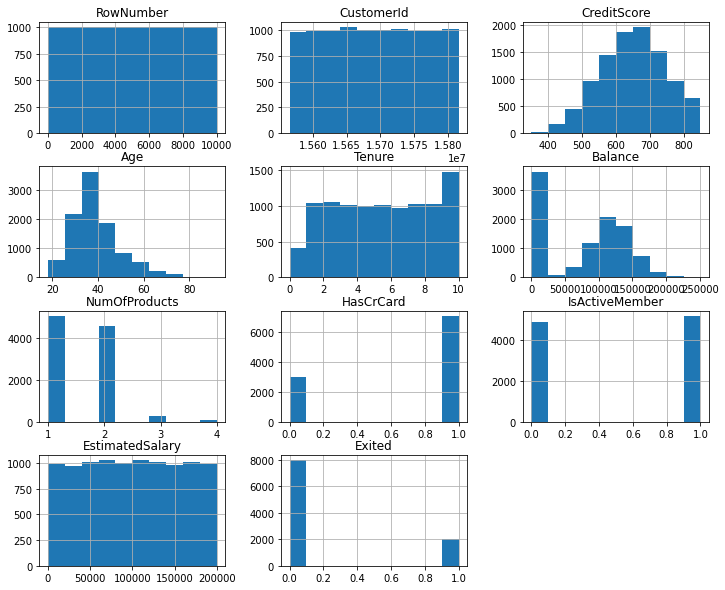

In [ ]:
# Exibir os histogramas das variáveis
df.hist(figsize=(12,10));
# Analisar os gráficos individualmente
# Age tem muitos clientes jovens e poucos clientes idosos

## **D.Visualização de Dados - Qual o perfil de clientes que cancelaram o contrato (Churn)?**

In [4]:
import numpy as np #  pacote algebra linear;
import seaborn as sns # visualização de dados;

In [6]:
# definindo as cores que quero no gráfico
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [7]:
# porcentagem de clientes que sairam do banco
# soma todos os valores da coluna Exited (variável Exited) e divide pela quantidade de variáveis existentes (quantidade de registros/linhas)
df['Exited'].sum()/df['Exited'].count() 

0.2037

###**Variáveis Categóricas**

 Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

* **Variável Sexo**

**Nota**: Variáveis categóricas são as que tem classe, como sexo, nacionalidade e outras.

In [8]:
# renomeando as categorias, taduzindo para o português
df['Gender'] = df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])

In [14]:
# Exibindo a média de uma variável/coluna do DataFrame. No caso, a média da variável Exited
print(df.Exited.mean())

#exited_por_sexo = df.groupby('Gender')
#print(exited_por_sexo) # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fdcec172b10>
#display(exited_por_sexo) # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fdcec172b10>

0.2037


In [20]:
# agrupa as variaveis Gender (Sexo) e depois faz a média do Exited
# .reset_index() é para tirar o index
df_plot = df.groupby ('Gender'). Exited.mean (). reset_index () 
df_plot

# 25% do Exited são pessoas do sexo feminino
# 16% do Exited são pessoas do sexo masculino

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


In [16]:
import matplotlib.pyplot as plt # para edições de gráficos

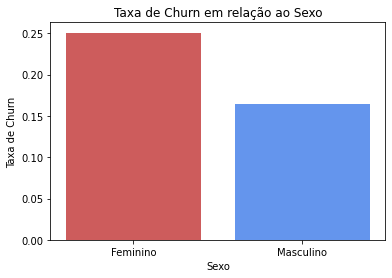

In [17]:
# Sexo em relação a variável churn
x = df_plot['Gender']
y = df_plot['Exited'] # y é minha variável de interesse
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

Observa-se que as mulheres têm um risco maior de Churn do que os homens. 

* **Variável País**

In [18]:
df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot 

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


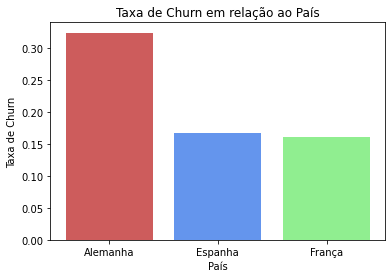

In [19]:
#País em relação a variável churn
x = df_plot['Geography']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

Em relação a variável país, observa-se que a porcentagem de Churn na **Alemanha** é bastante elevada, onde **32%** dos clientes encerraram a conta no banco. **Espanha** e **França** têm uma taxa de Churn parecidas em torno de **16%**.

**Variável Cartão de Crédito**

In [21]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


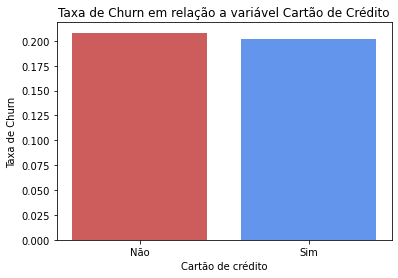

In [22]:
#Cartão de crédito em relação a variável churn
x = df_plot['HasCrCard']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.

* **Variável Membro Ativo**

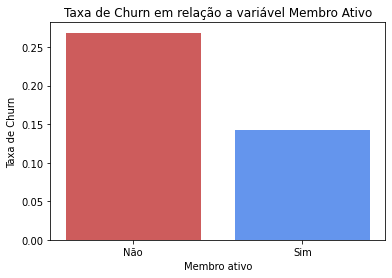

In [40]:
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
#Membro ativo em relação a variável churn
x = df_plot['IsActiveMember']
y = df_plot['Exited']
plt.bar(x,y,color=cols); # UTILIZANDO O matplotlib.pyplot
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

O Churn entre os clientes que não são ativos é maior do que os clientes ativos, tendo uma diferença de aproximadamente 12%.

Variáveis numéricas
Para as variáveis numéricas utilizaremos variáveis de barras para variáveis discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis.

Selecionamos, primeiramente, apenas as variáveis numéricas

In [35]:
# sem reset_index()
df_plot = df.groupby('Exited').Balance.mean()
df_plot

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [36]:
# com reset_index()
df_plot = df.groupby('Exited').Balance.mean().reset_index() # df.groupby(['Exited_cat'])['Balance'].mean()
df_plot

,Exited,Balance
0,0,72745.296779
1,1,91108.539337


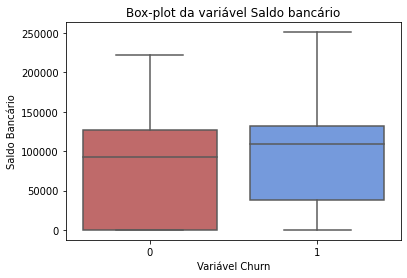

In [41]:
# utilizando seaborn
# box-plot saldo bancário em relação ao Churn

cols = [myred, myblue,mygreen]
# UTILIZANDO O seaborn
sns.boxplot(x = "Exited", y="Balance", data=df,palette=cols); # sns.boxplot(x = "Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df_plot = df.groupby(['Exited'])['Balance'].mean() # df.groupby(['Exited_cat'])['Balance'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

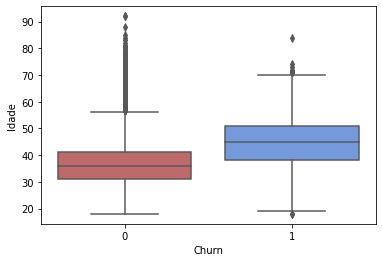

In [43]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited", y="Age" , data=df,palette=cols); # sns.boxplot(x="Exited_cat", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

#Conclusão

Analisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço.

Observa-se que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

## **4. PRÉ PROCESSAMENTO**

Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas.

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

In [55]:
# A PARTIR DE AGORA VOU TRABALHAR COM DF1, QUE É UMA BASE JÁ REFINADA PARA O PROBLEMA
# Exclui as colunas desnecessárias que não influenciarão na predição: RowNumber, CustomerId e Surname
# A coluna a ser predita não vai ser removida agora, será removida apenas na hora de fazer o modelo 
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname']) # df1 = df.drop(columns = ['RowNumber','CustomerId','Surname','Exited_cat'])
df1
# Observa-se que tem variáveis do tipo texto, como Gender e HasCrCard
# Essas variáveis precisam ser tratadas para serem tabalhadas no modelo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##**Dados faltantes**

In [56]:
# Contato número de observações faltantes no dataset para cada variável
df1.isnull().sum() # soma os dados faltantes
# neste caso não há dados faltante, ou seja, todas as colunas tem valores, nenhuma é null

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **5.MODELO**

Separando a variável respostas das características do modelo

In [57]:
y = df1['Exited'] # o que será previsto
#X = df1
X = df1.drop('Exited',axis = 1) # as características, ou seja, todas as colunas, menos a coluna a ser prevista. O axis = 1 indica que será excluída uma coluna
#X

Separando as variáveis numéricas das variáveis de texto

* Variáveis contínuas: numéricas
* Variáveis categóricas: grupos

In [64]:
# Variáveis Continuas
x_cont = ['CreditScore','Balance','Age','EstimatedSalary','Tenure']

In [65]:
# Variáveis Categóricas 
# Variáveis categóricas = conjunto de dados X menos o conjunto de dados das variáveis contínuas
x_cat = list(set(X)-set(x_cont)) # isso é para não precisar digitar a lista toda, ou seja, todas as colunas
x_dummies = X[x_cat]
x_dummies

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1
...,...,...,...,...,...
9995,France,Male,2,1,0
9996,France,Male,1,1,1
9997,France,Female,1,0,1
9998,Germany,Male,2,1,0


In [67]:
# TRATANDO VARIÁVEIS
# Tratando a variável sexo, ou seja, substituindo de Female e Male para 0 e 1
from sklearn.preprocessing import LabelEncoder # Biblioteca de machine learning
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


In [69]:
# get_dummies vai transformar as categorias
# Antes Geography tinha os valores France, Spain e Germany. 
# Viraram Geography_France, Geography_Spain e Geography_Germany que assumirá valores 0 ou 1. Tipo sim ou não
# O mesmo para NumOfProducts e HasCrCard
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts','HasCrCard'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
0,619,0,42,2,0.00,1,101348.88,1,0,0,1,0,0,0,0,1
1,608,0,41,1,83807.86,1,112542.58,0,0,1,1,0,0,0,1,0
2,502,0,42,8,159660.80,0,113931.57,1,0,0,0,0,1,0,0,1
3,699,0,39,1,0.00,0,93826.63,1,0,0,0,1,0,0,1,0
4,850,0,43,2,125510.82,1,79084.10,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,0,96270.64,1,0,0,0,1,0,0,0,1
9996,516,1,35,10,57369.61,1,101699.77,1,0,0,1,0,0,0,0,1
9997,709,0,36,7,0.00,1,42085.58,1,0,0,1,0,0,0,1,0
9998,772,1,42,3,75075.31,0,92888.52,0,1,0,0,1,0,0,0,1


In [70]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
651,720,1,52,7,0.00,1,14781.12,1,0,0,1,0,0,0,0,1
6560,577,0,32,1,0.00,0,9902.39,1,0,0,0,1,0,0,0,1
8974,706,0,43,1,0.00,0,31962.77,0,0,1,0,1,0,0,0,1
2348,824,1,45,3,129209.48,0,60151.77,1,0,0,1,0,0,0,1,0
5670,497,1,32,8,0.00,0,67364.42,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,1,47,7,107363.29,1,66799.28,0,1,0,1,0,0,0,0,1
7813,684,0,63,3,81245.79,0,69643.31,0,1,0,1,0,0,0,0,1
905,672,0,45,9,0.00,1,92027.69,1,0,0,1,0,0,0,0,1
5192,663,0,39,8,0.00,1,101168.90,1,0,0,0,1,0,0,0,1


In [72]:
# Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier() # Nunca faça isso, pois este é o default. O certo é ir ajustando os parâmetros
modelo.fit(x_treino,y_treino) # Passa o conjunto de treino, ou seja, as características x_treino e o resultado y_treino

DecisionTreeClassifier()

**O ideal é testar vários modelos para descobrir qual o melhor para o problema proposto.**

## **6. AJUSTE**

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Testa vários parâmetros para ver quais são os melhores para o modelo
# Os hiperparâmetros "fixos", você chama no momento que instancia o objeto do modelo
dt = DecisionTreeClassifier(random_state=61658)

# Os que você deseja testar, coloque em um dicionário:
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

grid = GridSearchCV(
    dt,
    params,
    cv=10,
    scoring='roc_auc', #Como regra geral, prefira métricas que não dependam de limiar na validação cruzada
    verbose=10,
    n_jobs=1,
)

grid.fit(x_treino,y_treino)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.710 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.728 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.726 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.729 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.723 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=10)

In [75]:
# retrona o melhor parâmetro
grid.best_params_
# {'criterion': 'entropy', 'max_depth': 6}
# critério entropia com profundida máxima de 6 níveis

{'criterion': 'entropy', 'max_depth': 6}

In [77]:
# melhor score obtido 83%
grid.best_score_

0.8311065784053231

In [79]:
# melhor modelo estimador
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=61658)

In [80]:
from sklearn.metrics import roc_auc_score # uma métrica

# previsão
roc_auc_score(y_teste, grid.predict_proba(x_teste)[:,1])

0.8522455322455322

In [82]:
# fazer uma lista de possíveis clientes que podem abandonar a empresa
# É a lista que o Marketing e o Atendimento precisa, pois se este cliente ligar, pode ser que ele cancele o contrato
df['proba'] = grid.predict_proba(x_final[x_treino.columns])[:,1]
df_pred = df[['CustomerId','proba']]

# Na empresa olha o chrun e a rentabilidade do cliente.
# Se for um cliente que não dá rentabilidade, não é muito rico perder ele

In [83]:
df_pred.sort_values('proba', ascending=False)

,CustomerId,proba
7216,15730287,1.0
9316,15766355,1.0
6869,15654457,1.0
3032,15800061,1.0
5137,15601594,1.0
...,...,...
7924,15613337,0.0
8399,15749365,0.0
3740,15777855,0.0
9379,15626042,0.0
